In [2]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
root = '/home/asrl/Downloads/'
gps_file = osp.join(root, 'gps_post_process.csv')
with open(gps_file, 'r') as gf:
    header = gf.readline()
    gps_lines = gf.readlines()
    gps_times = []
    for line in gps_lines:
        gps_times.append(float(line.split(',')[0]))

sbet_accel = []
sbet_times = []
sbet_angvel = []
for line in gps_lines:
    line = [float(x) for x in line.rstrip().split(',')]
    sbet_times.append(line[0])
    a_raw = np.array([line[15], line[14], line[13]]).reshape(3, 1)
    w_raw = np.array([line[12], line[11], line[10]]).reshape(3, 1)
    sbet_accel.append(a_raw.squeeze())
    sbet_angvel.append(w_raw.squeeze())

sbet_accel = np.array(sbet_accel)
sbet_times = np.array(sbet_times)
sbet_angvel = np.array(sbet_angvel)

In [29]:
with open(osp.join(root, 'aeva_imu.csv'), 'r') as f:
    h = f.readline()
    aeva_imu_lines = f.readlines()

accel_aeva = []
aeva_times = []
angvel_aeva = []
for line in aeva_imu_lines:
    line = [float(x) for x in line.rstrip().split(',')]
    aeva_times.append(line[0])
    a_raw = np.array([line[4], line[5], line[6]]).reshape(3, 1)
    w_raw = np.array([line[1], line[2], line[3]]).reshape(3, 1)
    accel_aeva.append(a_raw.squeeze())
    angvel_aeva.append(w_raw.squeeze())

accel_aeva = np.array(accel_aeva)
aeva_times = np.array(aeva_times) * 1.0e-6
angvel_aeva = np.array(angvel_aeva)

In [30]:
print(sbet_times[0])
print(aeva_times[0])

1676508570.196635
1676508590.104801


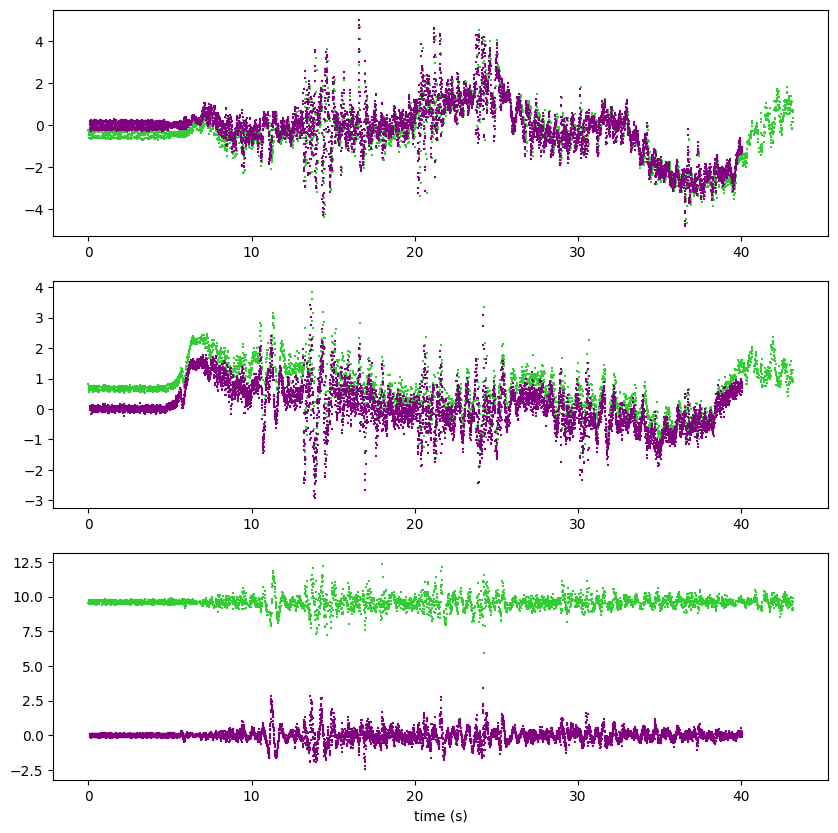

In [53]:
N = 8000
N0 = 0
t0 = aeva_times[N0]
fig, axs = plt.subplots(3, 1, figsize=(10,10))

axs[0].scatter(aeva_times[N0:N0+N//2] - t0, accel_aeva[N0:N0+N//2, 0], marker='+', color='limegreen', s=2, label='accel_aeva (x)')
axs[1].scatter(aeva_times[N0:N0+N//2] - t0, -1 * accel_aeva[N0:N0+N//2, 1], marker='+', color='limegreen', s=2, label='accel_aeva (y)')
axs[2].scatter(aeva_times[N0:N0+N//2] - t0, -1 * accel_aeva[N0:N0+N//2, 2], marker='+', color='limegreen', s=2, label='accel_aeva (z)')
# plt.scatter(imu_times[N0:N0+N] - imu_times[N0],accel_minus_gravity[N0:N0+N, 1, 0], marker='+', color='orange', s=2, label='ax (meas)')
N0 = 4000
axs[0].scatter(sbet_times[N0:N0+N] - t0,sbet_accel[N0:N0+N, 0], marker='+', color='purple', s=2, label='sbet_accel (x)')
axs[1].scatter(sbet_times[N0:N0+N] - t0,sbet_accel[N0:N0+N, 1], marker='+', color='purple', s=2, label='sbet_accel (y)')
axs[2].scatter(sbet_times[N0:N0+N] - t0,sbet_accel[N0:N0+N, 2], marker='+', color='purple', s=2, label='sbet_accel (z)')

plt.xlabel('time (s)')
plt.show()